In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.spatial as spa
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = np.asarray(pd.read_csv("/content/drive/MyDrive/hw07_data_set.csv", header = None))
initial_centroids = np.asarray(pd.read_csv("/content/drive/MyDrive/hw07_initial_centroids.csv", header =None))

#number of classes
K = initial_centroids.shape[0]

#number of datapoints
N = dataset.shape[0]

In [ ]:
#properties of the data distribution as given in the homework description
original_class_means = np.array([[2.5,2.5], [-2.5,2.5], [-2.5,-2.5], [2.5,-2.5], [0,0]])

original_class_covariances = [np.vstack([[0.8, -0.6],[-0.6,0.8]]), np.vstack([[0.8, 0.6], [0.6, 0.8]]), np.vstack([[0.8, -0.6], [-0.6,0.8]]), np.vstack([[0.8, 0.6], [0.6, 0.8]]), np.vstack([[1.6, 0.0], [0.0, 1.6]])]

original_class_sizes = np.array([50,50,50,50,100])


In [ ]:
print(initial_centroids)

[[-3.0439416   0.32509753]
 [-0.30377397  3.73480678]
 [ 1.17587258 -2.50984601]
 [ 0.91037084  0.87608158]
 [-1.98588337  2.98466811]]


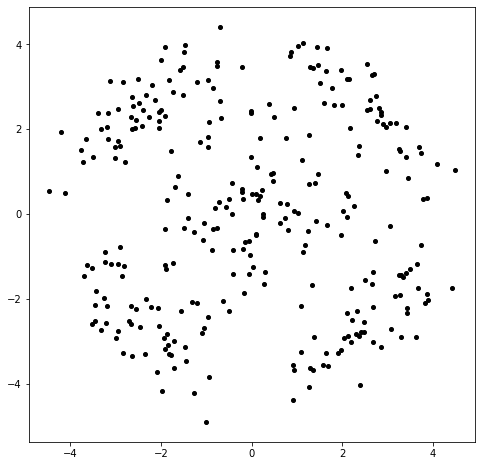

In [ ]:
plt.figure(figsize = (8, 8))
plt.plot(dataset[:,0], dataset[:,1], ".", markersize = 8, color = "black")

In [ ]:
#taken from lab11 code
def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)

    return(memberships)

In [ ]:
#adapted from lab11 code
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"])

    for c in range(K):
      plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10,  color = cluster_colors[c])

    plt.xlabel("x1")
    plt.ylabel("x2")

In [ ]:
#initialization of means, covariances, and frequencies
means = initial_centroids

memberships = update_memberships(initial_centroids, dataset)

groups, covariances = [], []
groups.append([dataset[memberships == c] for c in range(K)])

covariances.append([np.cov(groups[0][c][:,0], groups[0][c][:,1]) for c in range(K)])
covariances = np.squeeze(np.asarray(covariances))

frequencies = np.bincount(memberships) / N

In [ ]:
def e_step(point,class_no):
  D = point.shape[0]

  #1/sqrt(2pi^D x |sigma|)
  a = ((2*math.pi)**D * np.linalg.det(covariances[class_no]))**-1/2

  #e^(-0.5 x (x-mu)T x sigma' x (x-mu))
  expon = np.exp(-1/2*np.dot(np.dot((point-means[class_no]).transpose(),np.linalg.inv(covariances[class_no])), (point-means[class_no])))

  return a * expon * frequencies[class_no] #p(x|y=c) * P(y=c)


In [ ]:
def m_step(hk, class_no):

  #updating means
  means[class_no,:] = np.sum(np.multiply(hk[None].T, dataset), axis = 0)/np.sum(hk)

  #updating covariances
  diff = dataset - means[class_no]
  covariances[class_no] = np.matmul(np.transpose(diff),diff*np.transpose(hk[None])) / np.sum(hk)

  #update class frequencies
  frequencies[class_no] = np.sum(hk)/N


In [ ]:
#EM algorithm iterations
iterations = 100

for i in range(iterations):
    H = list()
    print("Iteration #{}".format(i+1))

    for c in range(K):
      H.append(np.asarray([e_step(dataset[p],c) for p in range(N)]))

    H = np.asarray(H) / np.sum(H, axis =0)

    for c in range(K):
      m_step(H[c], c)


Iteration #1
Iteration #2
Iteration #3
Iteration #4
Iteration #5
Iteration #6
Iteration #7
Iteration #8
Iteration #9
Iteration #10
Iteration #11
Iteration #12
Iteration #13
Iteration #14
Iteration #15
Iteration #16
Iteration #17
Iteration #18
Iteration #19
Iteration #20
Iteration #21
Iteration #22
Iteration #23
Iteration #24
Iteration #25
Iteration #26
Iteration #27
Iteration #28
Iteration #29
Iteration #30
Iteration #31
Iteration #32
Iteration #33
Iteration #34
Iteration #35
Iteration #36
Iteration #37
Iteration #38
Iteration #39
Iteration #40
Iteration #41
Iteration #42
Iteration #43
Iteration #44
Iteration #45
Iteration #46
Iteration #47
Iteration #48
Iteration #49
Iteration #50
Iteration #51
Iteration #52
Iteration #53
Iteration #54
Iteration #55
Iteration #56
Iteration #57
Iteration #58
Iteration #59
Iteration #60
Iteration #61
Iteration #62
Iteration #63
Iteration #64
Iteration #65
Iteration #66
Iteration #67
Iteration #68
Iteration #69
Iteration #70
Iteration #71
Iteration #72
I

In [ ]:
print(means)

[[-2.34421425 -2.46771887]
 [ 2.49054294  2.4749381 ]
 [ 2.55433757 -2.49150695]
 [ 0.15688058  0.16818892]
 [-2.31604076  2.4718563 ]]


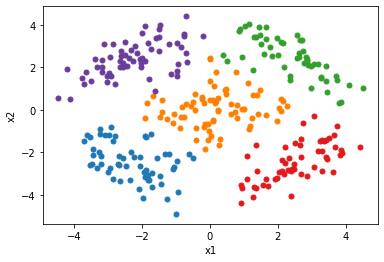

In [ ]:
memberships = update_memberships(means, dataset)
plot_current_state(means, memberships, dataset)
